## Polynomial Regression

It may happen that your data is too complex that you can't fit a straight line or use a linear regression for doing that, but Surprisingly,you can actually use a linear model to fit nonlinear data. 
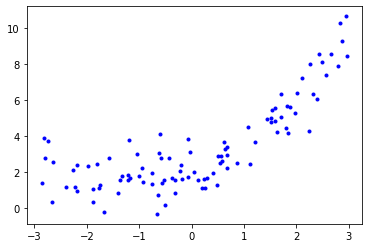
- A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. 
- This technique is called **Polynomial Regression**.

Let's take an example, 

- firstly we will generate the linear cooking data which will be quadratic equation. 
y = $a{x}^2 + bx + c$

In [1]:
### First we will generate the non - linear cooking data 
import numpy as np 
import matplotlib.pyplot as plt 
m = 100 
X = 6 * np.random.rand(m,1) - 3 
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) 

In [7]:
from sklearn.preprocessing import PolynomialFeatures 
polynomial_regression = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = polynomial_regression.fit_transform(X) 

In [3]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression() 
lr.fit(X_poly, y) 

LinearRegression()

## Regularized Linear Models

Let's recall the two famous known error, **Overfitting**, **Underfitting**. 
**Overfitting** Occurs when our model generalized well on our training data but fails to generalize well on new examples or testing data. 

**Underfitting** Occurs when our model neither performs well on training data not on testing data.

The Best Solution of this problem is **Regularization**, we will now study **regularization** in detail. 

### Ridge Regression 

Ridge Regression is a Regularization Technique that will regularize our parameters by just adding regularization parameter which is:- $\alpha\frac{1}{2}\sum \limits _{i = 1} ^{n} \Theta_{i}^2 $

So, Now Our Cost function becomes which is often called **Ridge Regression Cost Function**:-  
J($\Theta$) = $\frac{1}{m} +\sum \limits _{i = 1} ^{m} (\Theta^{T}x^{i} - y^{i})^{2} + \alpha\frac{1}{2}\sum \limits _{i = 1} ^{n} \Theta_{i}^2 $

Something to Note:- 

- We will not regularize our bias term $\Theta_{0}$, we will start regularizing our cost function from i = 1 to n leaving 0

So, What we will do?  

J($\Theta$) = $\frac{1}{m} +\sum \limits _{i = 0} ^{m} (\Theta^{T}x^{i} - y^{i})^{2}$

J($\Theta$) = $\frac{1}{m} +\sum \limits _{i = 1} ^{m} (\Theta^{T}x^{i} - y^{i})^{2} + \alpha\frac{1}{2}\sum \limits _{i = 1} ^{n} \Theta_{i}^2 $ 

If we put all the feature weights in 'w' vector, then the regularization term is simply a:- 

J($\Theta$) = $\frac{1}{m} +\sum \limits _{i = 1} ^{m} (\Theta^{T}x^{i} - y^{i})^{2} + \alpha\frac{1}{2}(|| w ||_{2})^{2}$ 

### Ridge Regression Gradient Descent 

$\frac{\partial}{\partial \Theta_{0} }{J}(\Theta) = \frac{2}{m} +  \sum  \limits _{i = 0} ^{m} (\Theta^{T}x^{i} - y^{i})^{2} $ for $\Theta_{j} = 0$

$\bigtriangledown {J}(\Theta) = \frac{2}{m} +  \sum  \limits _{i = 1} ^{m} (\Theta^{T}x^{i} - y^{i})^{2} $ for $\Theta_{j} = 1 ... n$

**Updating our theta**:-

$\Theta_{0} := \Theta_{0} - \alpha J(\Theta)$  
$\Theta_{j} := \Theta_{j} - \alpha \bigtriangledown{J}(\Theta)$

Now, we have developed our own Ridge Regression Model.

In [4]:
class Ridge(): 
    
    def __init__(self, alpha, iterations, l2_penalty): 
        self.alpha = alpha 
        self.iterations = iterations 
        self.l2_penalty = l2_penalty 
    
    def fit(self, X,y): 
        
        self.m, self.n = X.shape 
        
        self.feature_weights = np.zeros(self.n)  
        self.bias  = 0 
        
        self.X = X 
        self.y = y 
        
        for i in range(iterations): 
            self.update_params 
        return self
    def update_params(self): 
        
        y_pred = self.predict(X) 
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
        
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
    
    def predict(self, X): 
        return  X.dot(self.feature_weights) + self.bias 

In [5]:
from sklearn.linear_model import SGDRegressor 
reg = SGDRegressor(penalty="l2") 
reg.fit(X,y)

c:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

### Technical Note On Using Ridge Regression 

- Before Using Any Regularized Models be sure to, Scale the data using scikit learn library "Standard Scaler".   

(C) Copyright Newera || All Rights Reserved 